#### Example 1. Plot a default histogram


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline


In [2]:
pokemon = pd.read_csv('pokemon.csv')
pokemon.shape
pokemon.head(10)

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


(array([ 31.,  93., 163., 159., 128., 115.,  81.,  26.,   6.,   5.]),
 array([  5. ,  20.5,  36. ,  51.5,  67. ,  82.5,  98. , 113.5, 129. ,
        144.5, 160. ]),
 <a list of 10 Patch objects>)

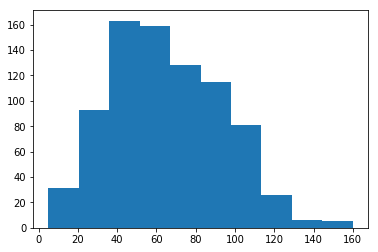

In [3]:
plt.hist(data=pokemon, x = 'speed')

#### Example 2. Histogram with fixed number of bins

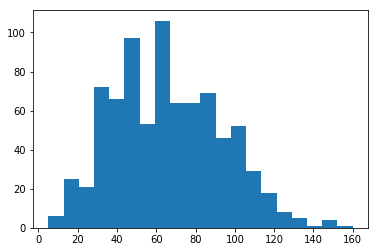

In [5]:
plt.hist(data = pokemon, x = 'speed', bins = 20);

#### Example 3. Histogram with dynamic number of bins

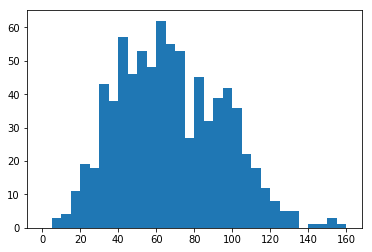

In [6]:
bins = np.arange(0, pokemon['speed'].max()+5, 5)
plt.hist(data = pokemon, x = 'speed', bins=bins);

#### Example 4. Plot the similar histogram with Seaborn's distplot()

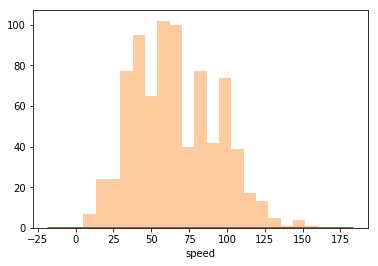

In [7]:
sb.distplot(pokemon['speed'])

# Set the argument `kde=False` to remove the estimate-line representing the Gaussian kernel density estimate.
sb.distplot(pokemon['speed'], kde=False)

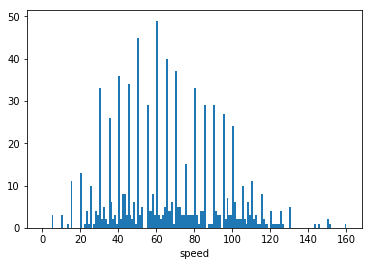

In [8]:
bin_edges = np.arange(0, pokemon['speed'].max()+1, 1)
sb.distplot(pokemon['speed'], bins = bin_edges, kde = False,
            hist_kws = {'alpha' : 1})

<b> Note:</b> From the Seaborn v0.11.0 onwards, this function is deprecated and will be removed in a future version. You can use either of the following two functions: displot() or histplot() to plot histograms using Seaborn.

#### Example 5. Plot two histograms side-by-side


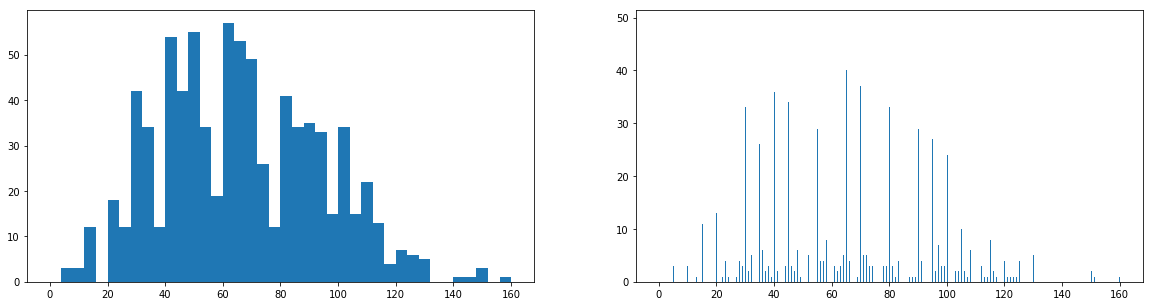

In [9]:
# Resize the chart, and have two plots side-by-side
# Set a larger figure size for subplots
plt.figure(figsize = [20, 5]) 

# histogram on left, example of too-large bin size
# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1) 
bins = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

# histogram on right, example of too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bins = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

###### Pokémon have a number of different statistics that describe their combat capabilities. Here, create a histogram that depicts the distribution of 'special-defense' values taken.

<b> Hint:</b> Try playing around with different bin width sizes to see what best depicts the data.

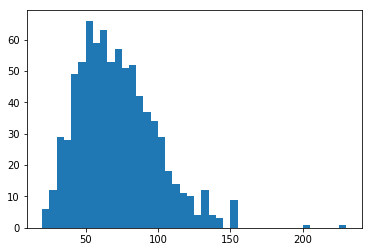

In [10]:
def histogram_solution_1():
  # data setup
    pokemon = pd.read_csv('pokemon.csv')
    bins = np.arange(20, pokemon['special-defense'].max()+5, 5)
    plt.hist(pokemon['special-defense'], bins = bins)

histogram_solution_1()

## Figures, Axes, and Subplots

At this point, you've seen and had some practice with some basic plotting functions using matplotlib and seaborn. The previous page introduced something a little bit new: creating two side-by-side plots through the use of matplotlib's subplot() function. If you have any questions about how that or the figure() function worked, then read on. This page will discuss the basic structure of visualizations using matplotlib and how subplots work in that structure.

The base of visualization in matplotlib is a Figure object. Contained within each Figure will be one or more Axes objects, each Axes object containing a number of other elements that represent each plot. In the earliest examples, these objects have been created implicitly. Let's say that the following expression is run inside a Jupyter notebook to create a histogram:

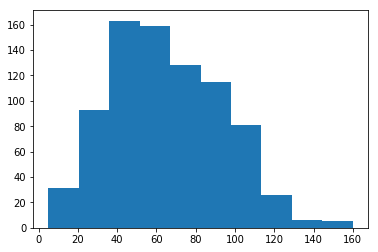

In [11]:
plt.hist(data=pokemon, x='speed');

Since we don't have a Figure area to plot inside, Python first creates a Figure object. And since the Figure doesn't start with any Axes to draw the histogram onto, an Axes object is created inside the Figure. Finally, the histogram is drawn within that Axes.

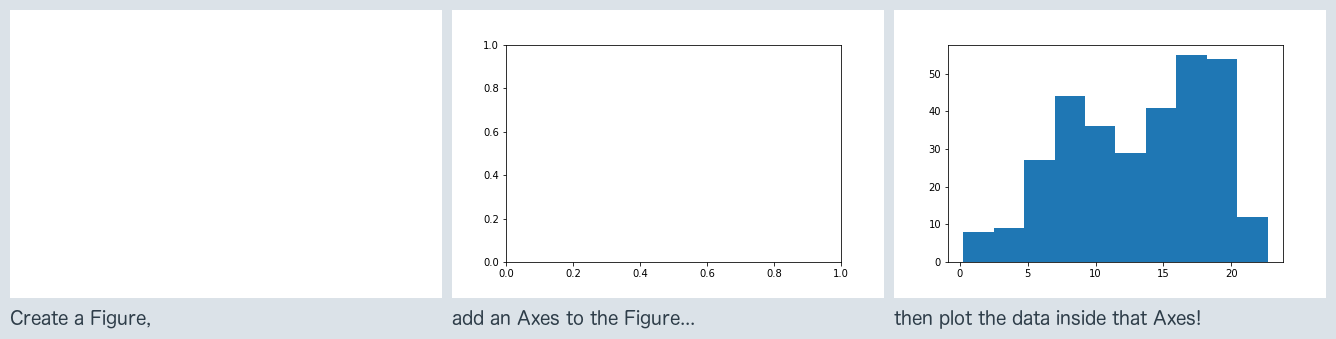

This hierarchy of objects is useful to know about so that we can take more control over the layout and aesthetics of our plots. One alternative way we could have created the histogram is to explicitly set up the Figure and Axes like this:

#### Example 1. Demonstrate figure.add_axes() and axes.hist()

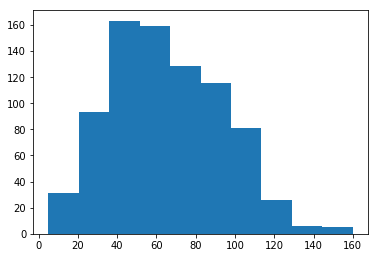

In [12]:
# Create a new figure
fig = plt.figure()

# The argument of add_axes represents the dimensions [left, bottom, width, height] of the new axes. 
# All quantities are in fractions of figure width and height.
ax = fig.add_axes([.125, .125, .775, .777])
ax.hist(data=pokemon, x='speed');

#### Example 2. Use axes with seaborn.countplot()

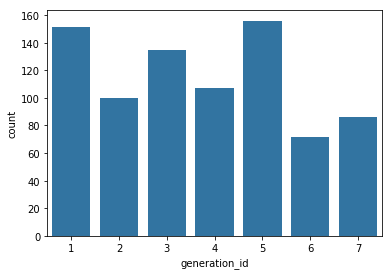

In [13]:
fig = plt.figure()
ax = fig.add_axes([.125, .125, .775, .785])
base_color = sb.color_palette()[0]

sb.countplot(data = pokemon, x = 'generation_id', color = base_color, ax =ax);

#### Example 3. Sub-plots

<Figure size 1440x360 with 0 Axes>

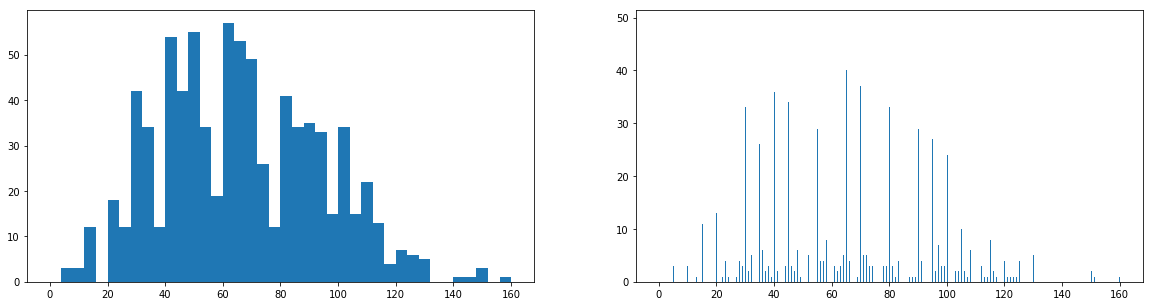

In [14]:
# Resize the chart, and have two plots side-by-side
# set a larger figure size for subplots
fig = plt.figure(figsize = [20, 5])

# Resize the chart, and have two plots side-by-side
# set a larger figure size for subplots
plt.figure(figsize = [20, 5]) 

# histogram on left, example of too-large bin size
# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1)
bins = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data=pokemon, x = 'speed', bins = bins);

# histogram on right, example of too-small bin size
# 1 row, 2 cols, subplot 2
plt.subplot(1, 2, 2)
bins = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data=pokemon, x = 'speed', bins = bins);

#### Additional Techniques

To close this page, we'll quickly run through a few other ways of dealing with Axes and subplots. The techniques above should suffice for basic plot creation, but you might want to keep the following in the back of your mind as additional tools to break out as needed.

If you don't assign Axes objects as they're created, you can retrieve the current Axes using `ax = plt.gca()`, or you can get a list of all Axes in a Figure `fig` by using `axes = fig.get_axes()`. As for creating subplots, you can use `fig.add_subplot()` in the same way as `plt.subplot()` above. If you already know that you're going to be creating a bunch of subplots, you can use the `plt.subplots()` function:

#### Example 4. Demonstrate pyplot.sca() and pyplot.text() to generate a grid of subplots


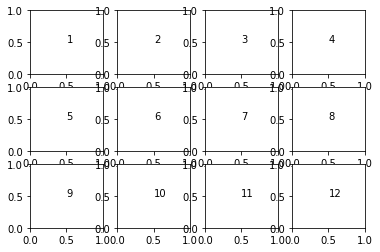

In [15]:
fig, axes = plt.subplots(3, 4) # grid of 3x4 subplots
axes = axes.flatten() # reshape from 3x4 array into 12-element vector
for i in range(12):
    plt.sca(axes[i]) # set the current Axes
    plt.text(0.5, 0.5, i+1) # print conventional subplot index number to middle of Axes

### Solution: Scales and Transformations Practice
#### Task 1:
There's a very long tail of Pokemon heights. Here, I've focused on Pokemon of height 6 meters or less, so that I can use a smaller bin size to get a more detailed look at the main data distribution.

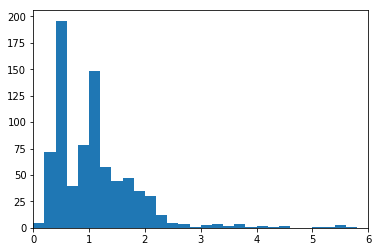

In [17]:
def scales_solution_1():
    # data setup
    pokemon = pd.read_csv('pokemon.csv')
    bins = np.arange(0, pokemon['height'].max()+0.2, 0.2)
    plt.hist(data = pokemon, x = 'height', bins = bins)
    plt.xlim((0,6))

scales_solution_1()

#### Task 2:
Since Pokemon weights are so skewed, I used a log transformation on the x-axis. Bin edges are in increments of 0.1 powers of ten, with custom tick marks to demonstrate the log scaling.

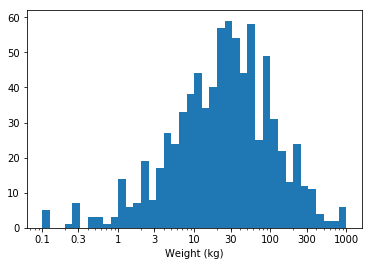

In [19]:
def scales_solution_2():
  # data setup
  pokemon = pd.read_csv('pokemon.csv')
  bins = 10 ** np.arange(-1, 3.0+0.1, 0.1)
  ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
  labels = ['{}'.format(val) for val in ticks]
  plt.hist(data = pokemon, x = 'weight', bins = bins)
  plt.xscale('log')
  plt.xticks(ticks, labels)
  plt.xlabel('Weight (kg)')

scales_solution_2()

### Kernel Density Estimation
Earlier in this lesson, you saw an example of kernel density estimation (KDE) through the use of seaborn's distplot function, which plots a KDE on top of a histogram.

#### Example 1. Plot the Kernel Density Estimation (KDE)

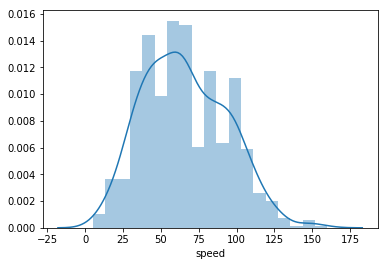

In [20]:
# The pokemon dataset is available to download at the bottom of this page.
sb.distplot(pokemon['speed']);

<b>Note</b> - The distplot() function is deprecated in Seaborn v 0.11.0, and will be removed in a future version. The alternative is either of the following:

displot() - A figure-level function with similar flexibility.
histplot() - An axes-level function for histograms.

See the same example with newer displot() function:

In [21]:
# Use this new function only with Seaborn 0.11.0 and above. 
# The kind argument can take any one value from {“hist”, “kde”, “ecdf”}.
sb.displot(pokemon['speed'], kind='hist');
# Use the 'kde' kind for kernel density estimation
# sb.displot(pokemon['speed'], kind='kde');

AttributeError: module 'seaborn' has no attribute 'displot'

#### Example 2. Demonstrating distplot() and rugplot() to plot the KDE

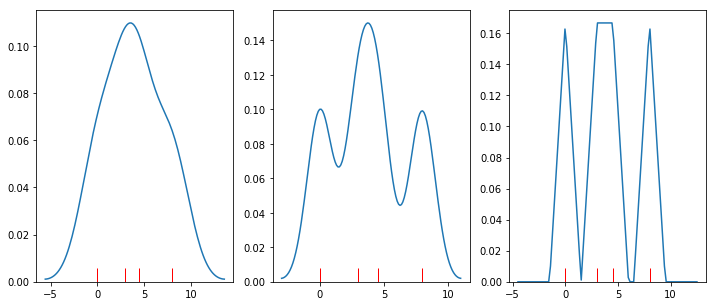

In [22]:
data = [0.0, 3.0, 4.5, 8.0]
plt.figure(figsize = [12, 5])

# left plot: showing kde lumps with the default settings
plt.subplot(1, 3, 1)
sb.distplot(data, hist = False, rug = True, rug_kws = {'color' : 'r'})

# central plot: kde with narrow bandwidth to show individual probability lumps
plt.subplot(1, 3, 2)
sb.distplot(data, hist = False, rug = True, rug_kws = {'color' : 'r'},
            kde_kws = {'bw' : 1})

# right plot: choosing a different, triangular kernel function (lump shape)
plt.subplot(1, 3, 3)
sb.distplot(data, hist = False, rug = True, rug_kws = {'color' : 'r'},
            kde_kws = {'bw' : 1.5, 'kernel' : 'tri'})